importing various libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing the customer segmentation dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/internship_sem6/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


dropping customerid column as it seems irrelevant in making the model

In [3]:
df1=df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


plotting age frequency of customers

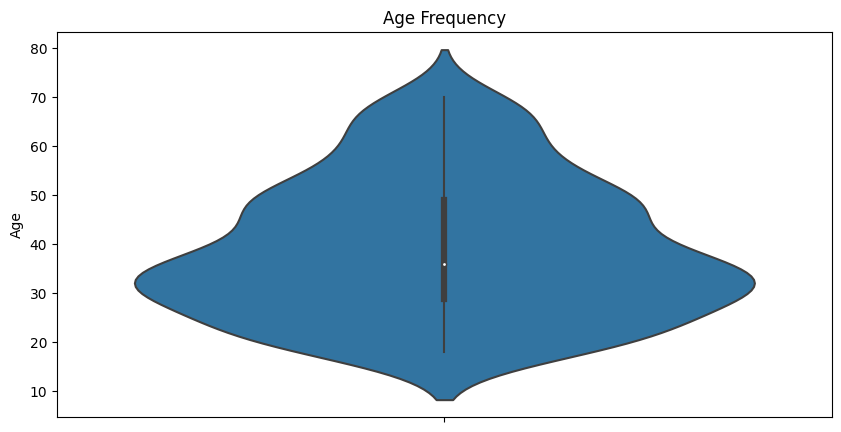

In [4]:
plt.figure(figsize=(10,5))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=df1["Age"])
plt.show()

box plot of annual income and spending score

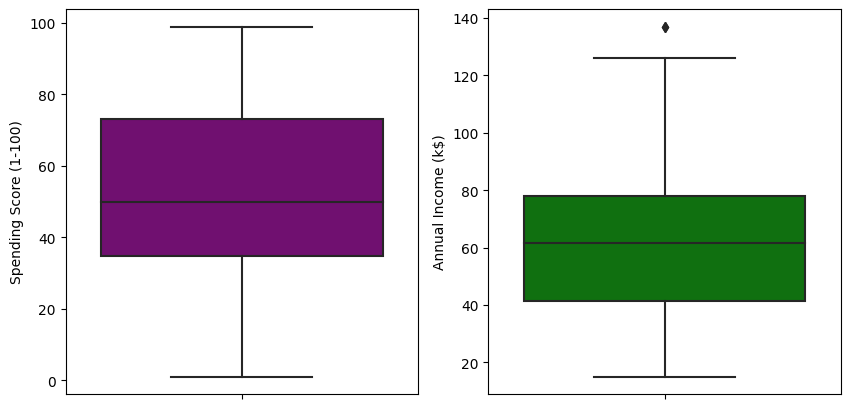

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df1["Spending Score (1-100)"], color="purple")
plt.subplot(1,2,2)
sns.boxplot(y=df1["Annual Income (k$)"], color="green")
plt.show()

bar chart for comparison of female and male population

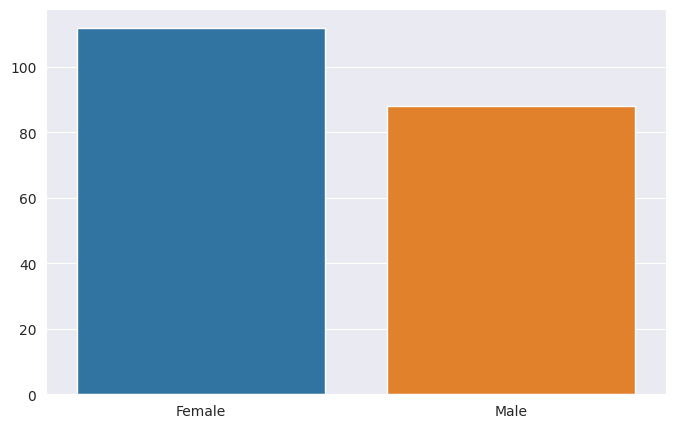

In [6]:
gender = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.barplot(x=gender.index, y=gender.values)
plt.show()

bar chart of number of customers in specific age groups

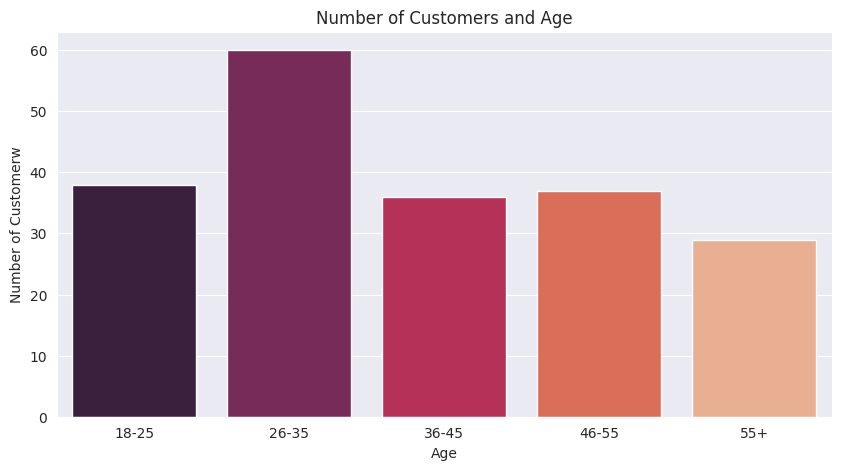

In [7]:
age18_25 = df1.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df1.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df1.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df1.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df1.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customers and Age")
plt.xlabel("Age")
plt.ylabel("Number of Customerw")
plt.show()

bar chart of number of customers according to their spending score

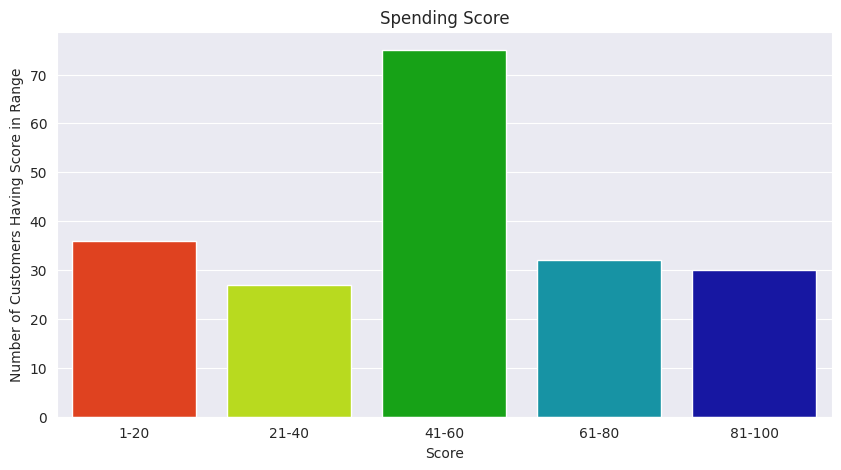

In [8]:
ss1_20 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 1) & (df1["Spending Score (1-100)"] <= 20)]
ss21_40 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 21) & (df1["Spending Score (1-100)"] <= 40)]
ss41_60 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 41) & (df1["Spending Score (1-100)"] <= 60)]
ss61_80 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 61) & (df1["Spending Score (1-100)"] <= 80)]
ss81_100 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 81) & (df1["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of Customers Having Score in Range")
plt.show()

bar chart of number of customers in each annual income range

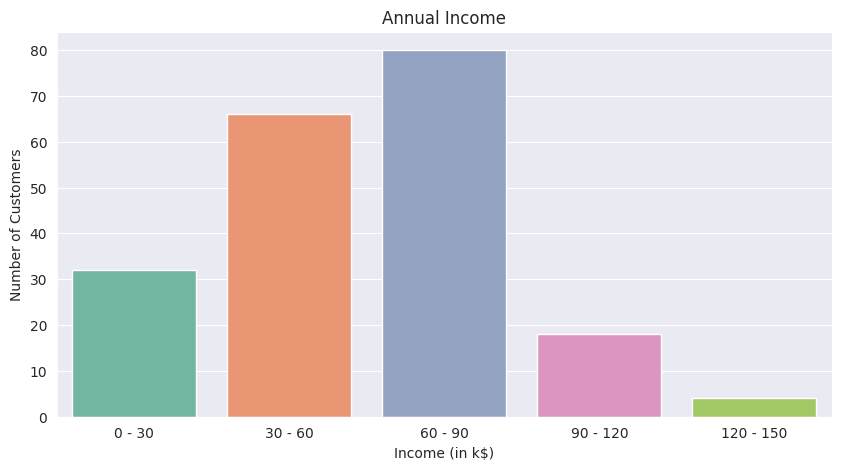

In [9]:
ai0_30 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 0) & (df1["Annual Income (k$)"] <= 30)]
ai31_60 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 31) & (df1["Annual Income (k$)"] <= 60)]
ai61_90 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 61) & (df1["Annual Income (k$)"] <= 90)]
ai91_120 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 91) & (df1["Annual Income (k$)"] <= 120)]
ai121_150 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 121) & (df1["Annual Income (k$)"] <= 150)]

aix = ["0 - 30", "30 - 60", "60 - 90", "90 - 120", "120 - 150"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Income")
plt.xlabel("Income (in k$)")
plt.ylabel("Number of Customers")
plt.show()

finding the value of k(number of clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

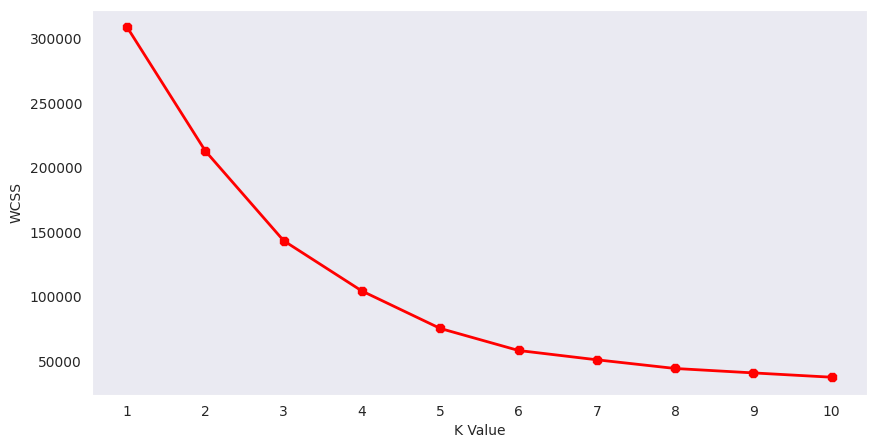

In [10]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

optimal value of k is 5
3D plot to visualize spending score of customers against their annual income

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


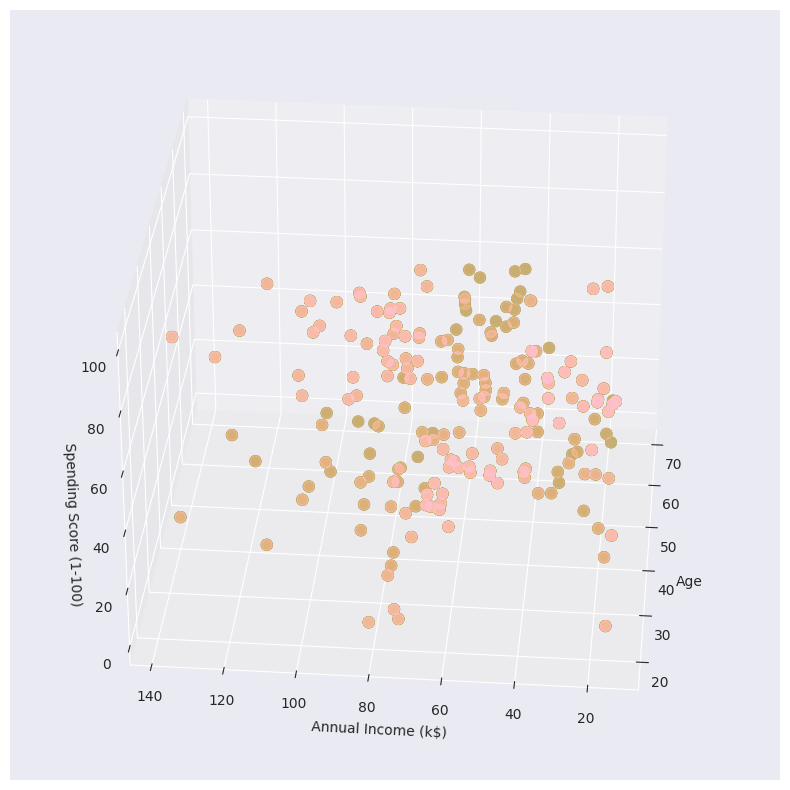

In [11]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age, df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c='blue', s=60)
ax.scatter(df1.Age, df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c='yellow', s=60)
ax.scatter(df1.Age, df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c='green', s=60)
ax.scatter(df1.Age, df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c='orange', s=60)
ax.scatter(df1.Age, df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c='pink', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()